In [1]:
import pandas as pd


In [7]:
def fix_col(col, errors="coerce"):
    return pd.to_numeric(col.apply(lambda x: str(x).replace(",","")), errors=errors)


In [8]:
df = pd.read_csv("data/std-state.csv",skiprows=4)
df.head()

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population
0,Primary and Secondary Syphilis,2000,Alabama,1,All age groups,All races/ethnicities,Both sexes,123,2.8,"4,451,497"
1,Primary and Secondary Syphilis,2012,Alabama,1,All age groups,All races/ethnicities,Both sexes,216,4.5,"4,816,089"
2,Primary and Secondary Syphilis,2008,Alabama,1,All age groups,All races/ethnicities,Both sexes,449,9.6,"4,673,889"
3,Primary and Secondary Syphilis,2013,Alabama,1,All age groups,All races/ethnicities,Both sexes,183,3.8,"4,830,533"
4,Primary and Secondary Syphilis,2002,Alabama,1,All age groups,All races/ethnicities,Both sexes,149,3.3,"4,471,462"


In [9]:
us = pd.read_csv("data/std-us.csv",skiprows=4)
us.head()

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population
0,Primary and Secondary Syphilis,2003,United States,NaN,All age groups,All races/ethnicities,Both sexes,"7,177",2.5,"290,242,027"
1,Primary and Secondary Syphilis,2002,United States,NaN,All age groups,All races/ethnicities,Both sexes,"6,862",2.4,"287,745,630"
2,Primary and Secondary Syphilis,2013,United States,NaN,All age groups,All races/ethnicities,Both sexes,"17,375",5.5,"316,427,395"
3,Primary and Secondary Syphilis,2004,United States,NaN,All age groups,All races/ethnicities,Both sexes,"7,980",2.7,"292,936,109"
4,Primary and Secondary Syphilis,2010,United States,NaN,All age groups,All races/ethnicities,Both sexes,"13,774",4.5,"309,346,863"


In [10]:
def get_df(fname):
    df = pd.read_csv(fname,skiprows=4)
    df["rate100k"] = fix_col(df["Rate per 100000"])
    # df["pop"] = fix_col(df["Population"])
    df["cases"] = fix_col(df["Cases"])
    return df

states = get_df("data/std-state.csv")
us = get_df("data/std-us.csv")

In [11]:
print us["Indicator"].unique()

['Primary and Secondary Syphilis' 'Early Latent Syphilis'
 'Congenital Syphilis' 'Chlamydia' 'Gonorrhea']


In [12]:
pd.concat([states, us])["Geography"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'United States'], dtype=object)

In [13]:
def timeline(df, indicator='Gonorrhea',values="rate100k"):
    ret = df.copy()

    ret = ret[ret["Indicator"] == indicator]

    ret = pd.pivot_table(ret, 
                   index="Geography",
                   columns="Year",
                   values=values)

    
    return ret

timeline(pd.concat([us, states])).head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,,,,,,,,,
Alabama,271.0,250.5,226.3,207.2,181.9,207.0,232.1,234.9,208.4,159.3,165.8,190.2,192.5,173.4,158.4,148.1,173.0
Alaska,57.5,72.1,99.8,88.5,86.0,89.9,93.3,85.2,84.3,142.5,178.3,136.2,99.3,153.0,181.9,150.7,196.9
Arizona,80.1,74.0,69.3,64.0,70.6,82.9,96.1,79.6,53.1,49.3,50.7,70.6,88.6,96.7,115.2,120.8,151.3
Arkansas,136.0,171.1,169.5,156.1,150.6,161.2,153.0,146.7,157.4,154.5,163.2,159.5,146.0,135.5,153.0,160.5,192.5
California,63.5,67.6,70.6,73.7,84.9,96.0,93.9,86.5,70.6,63.0,70.8,73.0,88.2,99.4,117.1,138.3,164.9


In [14]:
timeline(us, values="cases")

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,,,,,,,,,
United States,362920.0,361758.0,351836.0,335104.0,330132.0,339593.0,358366.0,355991.0,336742.0,301174.0,309341.0,321849.0,334826.0,333004.0,350062.0,395216.0,468514.0


In [15]:
timeline(us, indicator='Chlamydia', values="cases")

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,,,,,,,,,
United States,708698.0,783127.0,834503.0,877478.0,929462.0,976445.0,1030911.0,1108374.0,1210523.0,1244180.0,1307893.0,1412791.0,1422976.0,1401906.0,1441789.0,1526658.0,1598354.0


In [16]:
timeline(us, indicator='Primary and Secondary Syphilis',values="cases")

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,,,,,,,,,
United States,5973.0,6100.0,6862.0,7177.0,7980.0,8724.0,9756.0,11466.0,13500.0,13997.0,13774.0,13970.0,15667.0,17375.0,19999.0,23872.0,27814.0


### OK, all of the above checks out with press release 

Up until 2017, where preliminary numbers are not in Atlas.

In [17]:
def just_states(df, states=["Connecticut","United States"], *args, **kwargs):
    
    ret = timeline(df, **kwargs)
    return ret[ret.index.map(lambda x: x in states)]

print "Gonorrhea cases rate per 100K"
just_states(pd.concat([us, states]), values="rate100k", indicator='Gonorrhea').transpose()

Gonorrhea cases rate per 100K


Geography,Connecticut,United States
Year,,
2000,85.4,128.6
2001,74.3,126.9
2002,94.0,122.3
2003,89.8,115.5
2004,82.4,112.7
2005,79.1,114.9
2006,74.9,120.1
2007,66.7,118.1
2008,80.0,110.7


In [18]:
print "Gonorrhea cases (actual number)"
just_states(pd.concat([us, states]), values="cases", indicator='Gonorrhea').transpose()

Gonorrhea cases (actual number)


Geography,Connecticut,United States
Year,,
2000,2912.0,362920.0
2001,2546.0,361758.0
2002,3241.0,351836.0
2003,3114.0,335104.0
2004,2862.0,330132.0
2005,2750.0,339593.0
2006,2610.0,358366.0
2007,2327.0,355991.0
2008,2801.0,336742.0


In [19]:
""" CT numbers from DPH """
""" Gonorrhea 
2016 2,731
2017 3,913
"""
print "2013-15 increase"
print "CT: " + str((3913.-2860.)/2860.)

2013-15 increase
CT: 0.368181818182


In [20]:
"""['Primary and Secondary Syphilis' 'Early Latent Syphilis'
 'Congenital Syphilis' 'Chlamydia' 'Gonorrhea']"""

print "Primary and Secondary Syphilis cases (actual number)"
just_states(pd.concat([us, states]), values="cases", 
            indicator='Primary and Secondary Syphilis').transpose()

Primary and Secondary Syphilis cases (actual number)


Geography,Connecticut,United States
Year,,
2000,16.0,5973.0
2001,12.0,6100.0
2002,28.0,6862.0
2003,30.0,7177.0
2004,45.0,7980.0
2005,58.0,8724.0
2006,64.0,9756.0
2007,39.0,11466.0
2008,34.0,13500.0


In [21]:
""" NUmbers from DPH """
""" 2017 110 also, no difference """
print(110.-56.)/56.

0.964285714286


In [22]:
print "Primary and Secondary Syphilis cases (rate/100K)"
just_states(pd.concat([us, states]), values="rate100k", 
            indicator='Primary and Secondary Syphilis').transpose()

Primary and Secondary Syphilis cases (rate/100K)


Geography,Connecticut,United States
Year,,
2000,0.5,2.1
2001,0.4,2.1
2002,0.8,2.4
2003,0.9,2.5
2004,1.3,2.7
2005,1.7,3.0
2006,1.8,3.3
2007,1.1,3.8
2008,1.0,4.4


In [23]:
"""['Primary and Secondary Syphilis' 'Early Latent Syphilis'
 'Congenital Syphilis' 'Chlamydia' 'Gonorrhea']"""

print "Primary and 'Chlamydia' cases (actual number)"
just_states(pd.concat([us, states]), 
            values="cases", 
            indicator='Chlamydia').transpose()

Primary and 'Chlamydia' cases (actual number)


Geography,Connecticut,United States
Year,,
2000,7604.0,708698.0
2001,7718.0,783127.0
2002,9808.0,834503.0
2003,9393.0,877478.0
2004,9552.0,929462.0
2005,11039.0,976445.0
2006,10946.0,1030911.0
2007,11454.0,1108374.0
2008,12519.0,1210523.0


In [24]:
""" 2017 data from DPH"""
(17750. - 12775.)/12775.

0.38943248532289626

In [25]:
print "2013 to 2016 increase"
print (13911. - 12775.) / 12775.
print (1598354.0 - 1401906.0) / 1401906.0

print "2012 to 2016 increase"
print (1598354.0 - 1422976.0) / 1422976.0

2013 to 2016 increase
0.0889236790607
0.140129224071
2012 to 2016 increase
0.123247335162


Primary and 'Chlamydia' cases (rate per 100K)


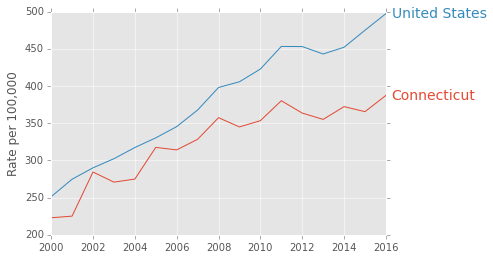

In [61]:
"""['Primary and Secondary Syphilis' 'Early Latent Syphilis'
 'Congenital Syphilis' 'Chlamydia' 'Gonorrhea']"""

print "Primary and 'Chlamydia' cases (rate per 100K)"
just_states(
    pd.concat([us, states]), 
    values="rate100k", 
    indicator='Chlamydia'
).transpose()

## Let's do this by race

In [27]:
race = get_df("data/std-states-race.csv")
race.head()

,Indicator,Year,Geography,Race/Ethnicity,Cases,Rate per 100000,rate100k,cases
0,Chlamydia,2000,Alabama,Asian,Data not available,Data not available,NaN,NaN
1,Chlamydia,2000,Alabama,Black/African American,Data not available,Data not available,NaN,NaN
2,Chlamydia,2000,Alabama,Hispanic/Latino,Data not available,Data not available,NaN,NaN
3,Chlamydia,2000,Alabama,White,Data not available,Data not available,NaN,NaN
4,Chlamydia,2000,Alaska,Asian,Data not available,Data not available,NaN,NaN


In [28]:
def subg_timeline(df, indicator='Gonorrhea',values="rate100k",subg_col="Race/Ethnicity"):
    
    ret = df.copy()
    ret = ret[ret["Indicator"] == indicator]
    
    ret = pd.pivot_table(ret,
                         index=subg_col,
                         columns="Year",
                         values=values)
    return ret
    
subg_timeline(race[(race["Geography"] == "Connecticut")])

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Race/Ethnicity,,,,,,,,,,
Asian,10.2,5.8,7.2,8.0,6.9,2.0,2.6,3.8,4.9,11.7
Black/African American,336.6,455.2,397.8,374.8,329.4,258.8,304.1,227.7,211.6,254.6
Hispanic/Latino,73.7,74.3,69.6,78.3,66.2,53.6,46.7,40.3,50.0,77.5
White,11.6,10.8,10.3,11.3,11.3,8.4,10.8,9.5,12.6,21.0


In [29]:
subg_timeline(race[(race["Geography"] == "Connecticut")],
             indicator='Chlamydia')

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Race/Ethnicity,,,,,,,,,,
Asian,48.6,74.1,59.1,51.3,51.4,29.5,23.5,19.6,27.1,31.4
Black/African American,1170.2,1235.2,1261.0,1220.4,1263.4,896.1,719.1,702.0,669.8,620.9
Hispanic/Latino,497.9,483.8,427.7,410.3,411.2,294.0,198.0,195.2,179.0,200.3
White,57.7,65.5,68.9,78.0,93.6,52.5,41.0,46.7,50.2,51.2


In [30]:
"""['Primary and Secondary Syphilis' 'Early Latent Syphilis'
 'Congenital Syphilis' 'Chlamydia' 'Gonorrhea']"""
subg_timeline(race[(race["Geography"] == "Connecticut")],
             indicator='Primary and Secondary Syphilis')

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Race/Ethnicity,,,,,,,,,,
Asian,0.0,0.0,0.8,0.0,0.0,0.0,0.0,1.3,0.6,1.2
Black/African American,4.6,2.7,3.6,7.0,5.8,3.5,5.4,7.9,11.2,10.3
Hispanic/Latino,0.7,1.7,4.2,4.1,3.6,2.5,2.3,4.1,3.3,7.0
White,0.8,0.7,1.3,2.1,1.1,1.1,0.7,1.3,1.3,1.3


In [31]:
age = get_df("data/std-age-ct.csv")
age.head()

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population,rate100k,cases
0,Primary and Secondary Syphilis,2009,Connecticut,9,30-34,All races/ethnicities,Both sexes,6,3,"199,538",3.0,6
1,Primary and Secondary Syphilis,2009,Connecticut,9,35-39,All races/ethnicities,Both sexes,12,5.3,"227,134",5.3,12
2,Primary and Secondary Syphilis,2009,Connecticut,9,40-44,All races/ethnicities,Both sexes,8,3.1,"260,440",3.1,8
3,Primary and Secondary Syphilis,2011,Connecticut,9,30-34,All races/ethnicities,Both sexes,9,4.3,"210,617",4.3,9
4,Primary and Secondary Syphilis,2011,Connecticut,9,35-39,All races/ethnicities,Both sexes,3,1.4,"211,532",1.4,3


In [32]:
subg_timeline(age,subg_col="Age Group")

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Age Group,,,,,,,,,,,,,,,,,
30-34,107.9,104.6,131.7,137.1,131.4,123.9,132.9,100.3,114.1,92.2,100.9,104.0,89.0,157.5,130.3,130.6,168.8
35-39,59.7,48.2,86.2,84.5,81.1,80.5,76.6,63.0,65.0,58.1,54.0,61.5,53.0,77.8,96.1,77.2,97.5
40-44,30.3,31.9,43.7,44.6,44.7,51.6,47.3,33.7,42.3,35.7,35.7,35.2,29.3,47.3,54.1,52.2,57.2
45-54,16.5,10.6,15.5,16.6,23.6,17.9,16.4,15.1,20.9,15.2,16.5,14.1,14.5,30.0,26.7,25.7,33.3
55-64,8.1,4.1,5.3,6.2,7.1,6.6,5.2,6.5,8.4,6.4,3.1,2.2,4.1,11.3,8.2,14.7,13.7
65+,2.1,0.6,1.5,0.9,1.5,1.7,1.1,1.1,1.9,1.4,0.6,1.0,0.4,1.3,3.1,1.8,1.8
Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
sex = get_df("data/std-states-sex.csv")
sex.head()


,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population,rate100k,cases
0,Primary and Secondary Syphilis,2000,Alabama,1,All age groups,All races/ethnicities,Male,60,2.8,"2,148,964",2.8,60.0
1,Primary and Secondary Syphilis,2006,Alabama,1,All age groups,All races/ethnicities,Female,116,4.9,"2,368,844",4.9,116.0
2,Primary and Secondary Syphilis,2005,Alabama,1,All age groups,All races/ethnicities,Female,69,2.9,"2,342,920",2.9,69.0
3,Primary and Secondary Syphilis,2014,Alabama,1,All age groups,All races/ethnicities,Male,144,6.1,"2,348,049",6.1,144.0
4,Primary and Secondary Syphilis,2016,Alabama,1,All age groups,All races/ethnicities,Male,296,12.6,"2,353,184",12.6,296.0


In [34]:
subg_timeline(sex[sex["Geography"] == "Connecticut"],subg_col="Sex")

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Sex,,,,,,,,,,,,,,,,,
Female,92.2,79.9,107.7,107.2,98.5,89.2,82.9,76.9,94.2,83.0,78.9,74.8,62.6,77.0,60.2,46.3,63.3
Male,78.1,68.1,79.4,71.4,65.4,68.4,66.6,56.1,65.0,62.1,64.3,61.3,55.9,82.1,69.5,70.6,89.3


In [35]:
print "Syphilis rate 100K, Conn."
subg_timeline(sex[sex["Geography"] == "Connecticut"],subg_col="Sex",indicator='Primary and Secondary Syphilis').transpose()

Syphilis rate 100K, Conn.


Sex,Female,Male
Year,,
2000,0.4,0.5
2001,0.1,0.6
2002,0.2,1.5
2003,0.2,1.6
2004,0.2,2.5
2005,0.1,3.3
2006,0.1,3.6
2007,0.1,2.2
2008,0.0,2.0


In [36]:
subg_timeline(sex[sex["Geography"] == "Connecticut"],subg_col="Sex",indicator='Gonorrhea')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Sex,,,,,,,,,,,,,,,,,
Female,92.2,79.9,107.7,107.2,98.5,89.2,82.9,76.9,94.2,83.0,78.9,74.8,62.6,77.0,60.2,46.3,63.3
Male,78.1,68.1,79.4,71.4,65.4,68.4,66.6,56.1,65.0,62.1,64.3,61.3,55.9,82.1,69.5,70.6,89.3


In [37]:
subg_timeline(sex[sex["Geography"] == "Connecticut"],subg_col="Sex",indicator='Chlamydia')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Sex,,,,,,,,,,,,,,,,,
Female,354.6,354.7,436.5,410.2,414.2,470.5,460.0,480.6,516.0,497.7,502.1,533.5,513.6,499.6,516.5,494.2,516.3
Male,82.7,86.9,123.6,123.6,128.1,156.7,161.2,168.9,190.6,185.5,196.6,218.8,201.3,198.5,214.3,224.1,243.6


In [38]:
# Make charts

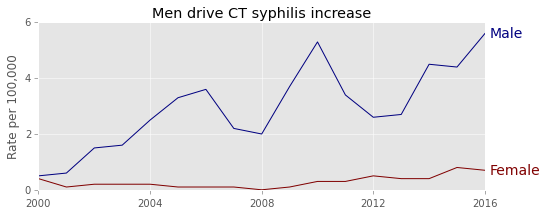

In [390]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick  
from matplotlib.ticker import MaxNLocator
def make_chart(df,title="",labels=None,ylabel="Rate per 100,000",figsize=(6,3),
              xticks=[2000,2017],ax=None,maxYticks=2):
        ax = df.plot(figsize=figsize,ax=ax,colors=["maroon","navy"])
        ax.tick_params(top=False,right=False)
        ax.legend().remove()
        ax.set_ylabel(ylabel)
        ax.set_xlabel("")
        ax.set_title(title)
        ax.set_xticks(xticks)
        ax.yaxis.set_major_locator(MaxNLocator(maxYticks))
        
        fmt = '{x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick) 
        
        if labels is None:
            labels = df.columns
        for line, name in zip(ax.lines, labels):
            y = line.get_ydata()[-1]
            ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                        xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                        size=14, va="center")
    
make_chart(subg_timeline(sex[sex["Geography"] == "Connecticut"],
                         subg_col="Sex",
                         indicator='Primary and Secondary Syphilis').transpose(),
           title="Men drive CT syphilis increase",
           xticks=[2000,2004,2008,2012,2016],
           figsize=(8,3),
           maxYticks=3
          )
plt.savefig("syphilis-gender-ct.png",bbox_inches='tight')

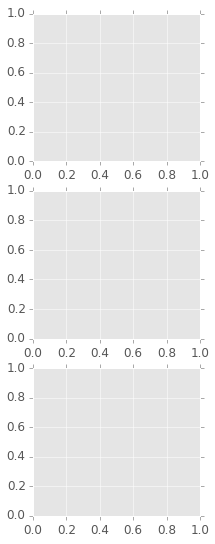

In [432]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(3,9))

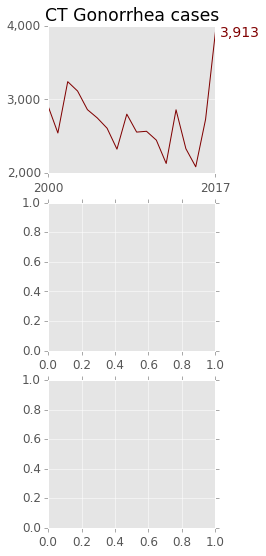

In [433]:
gon = timeline(states[states["Geography"] == "Connecticut"],
                indicator='Gonorrhea',
                values="cases").transpose().reset_index()
gon.columns=["Year","Cases"]
make_chart(pd.concat([gon,pd.DataFrame([{"Year":2017,"Cases":3913}])]).set_index("Year"),
           ylabel="",
           title="CT Gonorrhea cases",
           figsize=None,
           labels=["3,913"],
           xticks=[2000,2017],
          ax=axes[0])
#plt.savefig("gonorrhea-ct.png",bbox_inches='tight')
fig

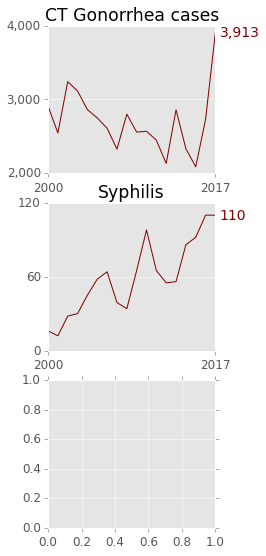

In [434]:
syph = timeline(states[states["Geography"] == "Connecticut"],
                indicator='Primary and Secondary Syphilis',
                values="cases").transpose().reset_index()
syph.columns=["Year","Cases"]
make_chart(pd.concat([syph,pd.DataFrame([{"Year":2017,"Cases":110}])]).set_index("Year"),
           ylabel="",
           title="Syphilis",
           figsize=None,
           labels=["110"],
           xticks=[2000,2017],
           ax=axes[1])
fig
#plt.savefig("syphilis-ct.png",bbox_inches='tight')

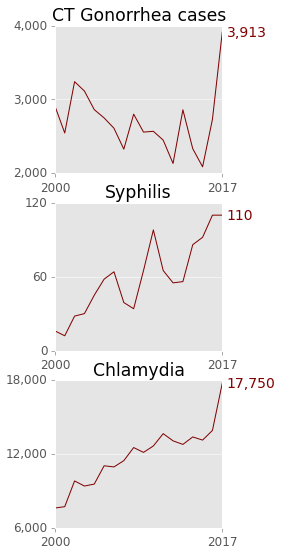

In [435]:
chl = timeline(states[states["Geography"] == "Connecticut"],
                indicator='Chlamydia',
                values="cases").transpose().reset_index()
chl.columns=["Year","Cases"]
make_chart(pd.concat([chl,pd.DataFrame([{"Year":2017,"Cases":17750}])]).set_index("Year"),
           ylabel="",
           title="Chlamydia",
           figsize=None,
           labels=["""17,750"""],
           #labels=[""],
           xticks=[2000,2017],
          ax=axes[2])
fig

#plt.savefig("chlamydia-ct.png",bbox_inches='tight')

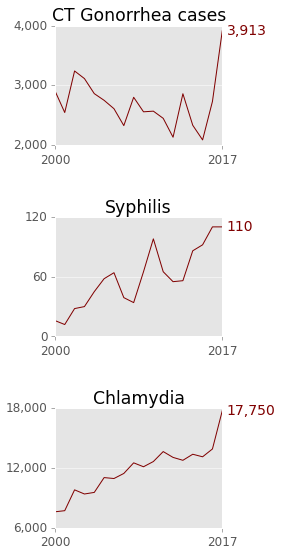

In [436]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.6)
plt.rcParams.update({'font.size': 12,'font.family':"Times"})
#plt.tick_params(top=False)
fig


In [437]:
fig.savefig("syph-gon-chl-combined.png",bbox_inches='tight')

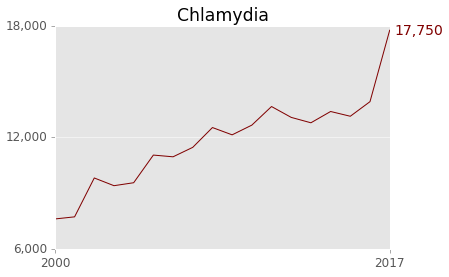

In [438]:
chl = timeline(states[states["Geography"] == "Connecticut"],
                indicator='Chlamydia',
                values="cases").transpose().reset_index()
chl.columns=["Year","Cases"]
make_chart(pd.concat([chl,pd.DataFrame([{"Year":2017,"Cases":17750}])]).set_index("Year"),
           ylabel="",
           title="Chlamydia",
           figsize=None,
           labels=["""17,750"""],
           #labels=[""],
           xticks=[2000,2017],
          ax=None)

plt.savefig("chlamydia featured image.png",bbox_inches='tight')